# Logistic Regression Demo

In this notebook, I'm proposing a template in which you can simply load any dataset you require, perform some exploratory data analysis and data preprocessing, and get an accurate yes/no prediction on whether or not a customer will take a certain action, or any other sort of classification task. Modifications may be necessary in order to fit different types of data and or datasets.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [3]:
X.shape, y.shape

((400, 2), (400,))

In [4]:
dataset.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train, y_train)
print()
print(X_test, y_test)

     Age  EstimatedSalary
250   44            39000
63    32           120000
312   38            50000
159   32           135000
283   52            21000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[300 rows x 2 columns] 250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
146   27            96000
135   23            63000
390   48            33000
264   48            90000
364   42           104000

[100 rows x 2 columns] 132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [10]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state=0)

model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Predicting a new result

In [11]:
# Prediction
print("Predicted outcome for 30-year old with 87000 salary: ", model_log.predict(sc.transform([[30, 87000]])))# Scale the input to match the scaled train data

Predicted outcome for 30-year old with 87000 salary:  [0]


## Predicting the Test set results

In [12]:
results = {'Actual': y_test, 'Predicted': y_pred}

results_df = pd.DataFrame(results)

results_df.reset_index(inplace=True, drop=True)

results_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


## Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sb.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

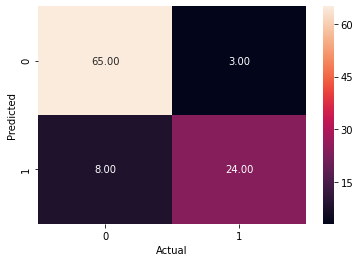

In [14]:
draw_cm(y_test, y_pred)

In [15]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score: ", accuracy)

Accuracy score:  0.89


### Observations based on the above heatmap:


We can see from the heatmap produced above how many true positives/true negatives and false positives/false negatives resulted from the logistic regression predictions.

1. True positives (predicted value is 1 (yes) and actual value is 1 (yes) - 24
2. True negatives (predicted value is 0 (no) and actual value is 0 (no) - 65
3. False positives (predicted value is 1 (yes) and actual value is 0 (no) - 8
4. False negatives (predicted value is 0 (no) and actual value is 1 (yes) - 3

The accuracy score shows us that the algorithm predicted the outcome correctly 89% of the time, but this may or may not be the best measure, depending upon your classification prediction needs.

Perhaps better measures are found in the precision, recall, and F1 scores, which will be calculated below.

### Precision:

In [17]:
from sklearn.metrics import precision_score

# Calculating precision score
precision = precision_score(y_test, y_pred)

precision

0.8888888888888888

We can see above that the logistic regression algorithm received a precision score of 0.88, which is calculated by dividing the number of true positives by the sum of true positives and false positives. That is, precision is the ratio of correctly predicted positives to all positive predictions, correct and incorrect.

### Recall:

In [18]:
from sklearn.metrics import recall_score

# Calculating recall score
recall = recall_score(y_test, y_pred)

recall

0.75

The algorithm receives a recall score of 0.75, which is calculated by dividing the number of true positives by the sum of true positives and false negatives. That is, recall is the ratio of correctly predicted positives to the sum of correctly predicted positives and incorrectly predicted negatives.

### F1 Score:

In [19]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

f1

0.8135593220338982

The algorithm receives an f1 score of 0.81. The F1 score intends to strike a balance between precision and recall, and is calculated thusly:

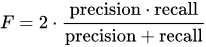

Source: https://wikimedia.org/api/rest_v1/media/math/render/svg/dd577aee2dd35c5b0e349327528a5ac606c7bbbf

### Business context:

So what does this mean for your business? For the sake of argument, let's consider a bank: if you need to know how many customers will default on a loan, the recall score would be very helpful. You want that score to be higher, because the higher it is, the more correct positive predictions and the less incorrect negative predictions the algorithm has made on whether or not a customer will default on a loan.

### Comparison chart of scores:

In [22]:
chart = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

chart

{'Accuracy': 0.89,
 'Precision': 0.8888888888888888,
 'Recall': 0.75,
 'F1': 0.8135593220338982}